In [1]:
import pickle as pkl
import pandas as pd

import matplotlib.pyplot as plt

# Global options
datapath = '../Data/'

# usage data

all_data = []

years = [2012, 2013, 2014, 2015, 2016]

# Subset for testing purposes - comment out in final
years = [2016]

'''
for year in years:
    fname = datapath + 'usage_data{:}.pkl'.format(year)
    with open(fname, 'rb') as handle:   
        all_data.append(pkl.load(handle))
'''
        
# All data
with open(datapath+'all_data.pkl', 'rb') as handle:
    all_data = pkl.load(handle)

#all_data = pd.concat(all_data)

# Take the first 1m rows
#all_data = all_data.iloc[:1000000]

# All data
with open(datapath+'all_locs.pkl', 'rb') as handle:
    locations = pkl.load(handle)
    
locations = locations.set_index('id')

with open(datapath+'station_id_to_cluster_id.pkl', 'rb') as handle:
    IDMap = pkl.load(handle)
    
with open(datapath+'clustered_locs.pkl', 'rb') as handle:
    clusteredLocs = pkl.load(handle)

In [2]:
#all_data['Start Date'] = all_data['Start Date'].astype('datetime64')
#all_data['End Date'] = all_data['End Date'].astype('datetime64')

print(clusteredLocs)
print(locations)
print(IDMap)
print(all_data)

                 name  capacity        lat       lon
0             Aldgate       155  51.514046 -0.074628
1               Angel       260  51.533240 -0.106523
2            Avondale       171  51.511550 -0.215143
3                Bank       117  51.512803 -0.091630
4            Bankside       210  51.506176 -0.098243
5            Barbican       113  51.520114 -0.095122
6           Battersea       389  51.471514 -0.163664
7       BatterseaPark       242  51.477410 -0.153850
8           Bayswater       246  51.514985 -0.186607
9           Belgravia       106  51.496673 -0.152871
10         Bermondsey       151  51.500848 -0.081218
11       BethnalGreen       357  51.527437 -0.057394
12          Blackwall        99  51.507199 -0.005898
13         Bloomsbury       409  51.522933 -0.126370
14            Borough        60  51.495926 -0.089864
15                Bow       343  51.525464 -0.023161
16            Brixton        97  51.463494 -0.114779
17         BrookGreen        66  51.495506 -0.

In [3]:
# I want to take all the journeys 

trafficIn = [ [ 0 for y in range( 24 ) ] for x in range( 117 ) ]
trafficOut = [ [ 0 for y in range( 24 ) ] for x in range( 117 ) ]

LOG_EVERY_N = 100000
countErr = 0
LOG_ERR_N = 100000

for ind in range(0,len(all_data)):
    if (ind % LOG_EVERY_N) == 0:
        print("GOOD -> " + str(ind))
    if (countErr % LOG_ERR_N) == 0:
        print("BAD -> " + str(countErr))
        
    if all_data['Start Date'].iloc[ind].year != 2016:
        countErr += 1
        continue
    startStation = int(all_data['StartStation Id'].iloc[ind])
    endStation = int(all_data['EndStation Id'].iloc[ind])
    startHour = int(all_data['Start Date'].iloc[ind].hour)
    endHour = int(all_data['End Date'].iloc[ind].hour)
    if startStation == 0 or endStation == 0:
        countErr += 1
        continue
    if startStation > 781 or endStation > 781:
        countErr += 1
        continue
    
    #print(startStation)
    #print(endStation) 
    startCluster = IDMap[startStation]
    endCluster = IDMap[endStation]
    #print(startCluster)
    #print(endCluster)
    trafficIn[endCluster][endHour] += 1
    trafficOut[startCluster][startHour] += 1

GOOD -> 0
BAD -> 0
GOOD -> 100000
BAD -> 100000
GOOD -> 200000
BAD -> 200000
GOOD -> 300000
BAD -> 300000
GOOD -> 400000
BAD -> 400000
GOOD -> 500000
BAD -> 500000
GOOD -> 600000
BAD -> 600000
GOOD -> 700000
BAD -> 700000
GOOD -> 800000
BAD -> 800000
GOOD -> 900000
BAD -> 900000
GOOD -> 1000000
BAD -> 1000000
GOOD -> 1100000
BAD -> 1100000
GOOD -> 1200000
BAD -> 1200000
GOOD -> 1300000
BAD -> 1300000
GOOD -> 1400000
BAD -> 1400000
GOOD -> 1500000
BAD -> 1500000
GOOD -> 1600000
BAD -> 1600000
GOOD -> 1700000
BAD -> 1700000
GOOD -> 1800000
BAD -> 1800000
GOOD -> 1900000
BAD -> 1900000
GOOD -> 2000000
BAD -> 2000000
GOOD -> 2100000
BAD -> 2100000
GOOD -> 2200000
BAD -> 2200000
GOOD -> 2300000
BAD -> 2300000
GOOD -> 2400000
BAD -> 2400000
GOOD -> 2500000
BAD -> 2500000
GOOD -> 2600000
BAD -> 2600000
GOOD -> 2700000
BAD -> 2700000
GOOD -> 2800000
BAD -> 2800000
GOOD -> 2900000
BAD -> 2900000
GOOD -> 3000000
BAD -> 3000000
GOOD -> 3100000
BAD -> 3100000
GOOD -> 3200000
BAD -> 3200000
GOOD ->

GOOD -> 25600000
BAD -> 25600000
GOOD -> 25700000
BAD -> 25700000
GOOD -> 25800000
BAD -> 25800000
GOOD -> 25900000
BAD -> 25900000
GOOD -> 26000000
BAD -> 26000000
GOOD -> 26100000
BAD -> 26100000
GOOD -> 26200000
BAD -> 26200000
GOOD -> 26300000
BAD -> 26300000
GOOD -> 26400000
BAD -> 26400000
GOOD -> 26500000
BAD -> 26500000
GOOD -> 26600000
BAD -> 26600000
GOOD -> 26700000
BAD -> 26700000
GOOD -> 26800000
BAD -> 26800000
GOOD -> 26900000
BAD -> 26900000
GOOD -> 27000000
BAD -> 27000000
GOOD -> 27100000
BAD -> 27100000
GOOD -> 27200000
BAD -> 27200000
GOOD -> 27300000
BAD -> 27300000
GOOD -> 27400000
BAD -> 27400000
GOOD -> 27500000
BAD -> 27500000
GOOD -> 27600000
BAD -> 27600000
GOOD -> 27700000
BAD -> 27700000
GOOD -> 27800000
BAD -> 27800000
GOOD -> 27900000
BAD -> 27900000
GOOD -> 28000000
BAD -> 28000000
GOOD -> 28100000
BAD -> 28100000
GOOD -> 28200000
BAD -> 28200000
GOOD -> 28300000
BAD -> 28300000
GOOD -> 28400000
BAD -> 28400000
GOOD -> 28500000
BAD -> 28500000
GOOD -> 28

(0, 127)

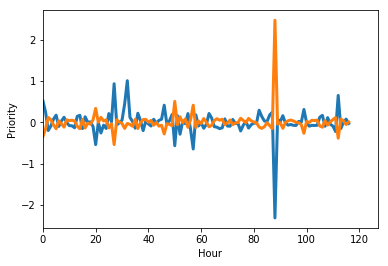

In [127]:
trafficNet = [ [ 0 for y in range( 24 ) ] for x in range( 117 ) ]
trafficPriority = [ [ 0 for y in range( 24 ) ] for x in range( 117 ) ]

clusterMorningNet = [ 0 for x in range( 117 ) ] 
clusterMorningPriority = [ 0 for x in range( 117 ) ] 
clusterEveningNet = [ 0 for x in range( 117 ) ] 
clusterEveningPriority = [ 0 for x in range( 117 ) ] 
    
for cluster in range(117):
    for hour in range(24):
        net = trafficIn[cluster][hour] - trafficOut[cluster][hour]
        flow = trafficIn[cluster][hour] + trafficOut[cluster][hour]
        trafficNet[cluster][hour] = (net/365.25)
        trafficPriority[cluster][hour] = ((net/365.25)/clusteredLocs['capacity'][cluster])
        #trafficPriority[cluster][hour] = ((net*flow)/clusteredLocs['capacity'][cluster])
        
        if hour == 7 or hour == 8 or hour == 9:
            clusterMorningNet[cluster] += (net/365.25)
        if hour == 16 or hour == 17 or hour == 18:
            clusterEveningNet[cluster] += (net/365.25)
                        
    clusterMorningPriority[cluster] = (clusterMorningNet[cluster]/clusteredLocs['capacity'][cluster])
    clusterEveningPriority[cluster] = (clusterEveningNet[cluster]/clusteredLocs['capacity'][cluster])
        
plt.plot(clusterMorningPriority, lw=3)
plt.xlabel('Hour')
plt.ylabel('Priority')
plt.xlim(0, 127)

plt.plot(clusterEveningPriority, lw=3)
plt.xlabel('Hour')
plt.ylabel('Priority')
plt.xlim(0, 127)


In [130]:

with open('../Data/priority_matrix.pkl', 'wb') as handle:
    pkl.dump(trafficNet,handle)

In [53]:
clusterPeakPosVal = [ 0 for x in range( 117 ) ]
clusterPeakPosTime = [ 0 for x in range( 117 ) ]
clusterPeakPosNet = [ 0 for x in range( 117 ) ] 
clusterPeakNegVal = [ 0 for x in range( 117 ) ]
clusterPeakNegTime = [ 0 for x in range( 117 ) ]
clusterPeakNegNet = [ 0 for x in range( 117 ) ] 
 
'''
for cluster in range(117):
    clusterPeakPosVal[cluster] = 0
    clusterPeakPosTime[cluster] = 0
    clusterPeakPosNet[cluster] = 0
    clusterPeakNegVal[cluster] = 0
    clusterPeakNegTime[cluster] = 0
    clusterPeakNegNet[cluster] = 0
'''
    
for cluster in range(117):
    for hour in range(24):
        priority = trafficPriority[cluster][hour]
        if priority > clusterPeakPosVal[cluster]:
            clusterPeakPosVal[cluster] = priority
            clusterPeakPosTime[cluster] = hour
            clusterPeakPosNet[cluster] = trafficNet[cluster][hour]
        if priority < clusterPeakNegVal[cluster]:
            clusterPeakNegVal[cluster] = priority
            clusterPeakNegTime[cluster] = hour 
            clusterPeakNegNet[cluster] = trafficNet[cluster][hour]
            
             

(0, 24)

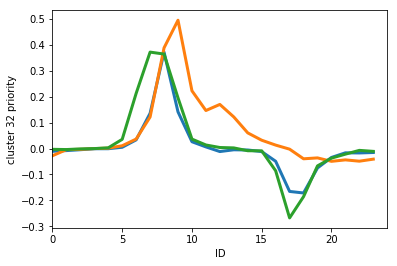

In [54]:
plt.plot(trafficPriority[112], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24) 

plt.plot(trafficPriority[32], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24)

plt.plot(trafficPriority[27], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24) 

(0, 24)

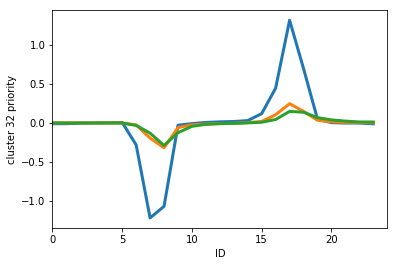

In [55]:
plt.plot(trafficPriority[88], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24) 

plt.plot(trafficPriority[50], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24)

plt.plot(trafficPriority[20], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24) 

(0, 24)

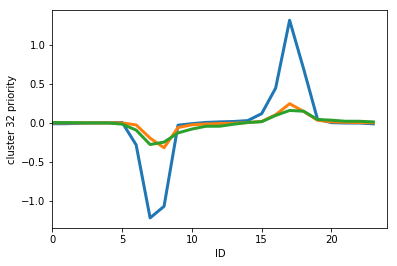

In [56]:
plt.plot(trafficPriority[88], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24) 

plt.plot(trafficPriority[50], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24)

plt.plot(trafficPriority[57], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24) 

(0, 24)

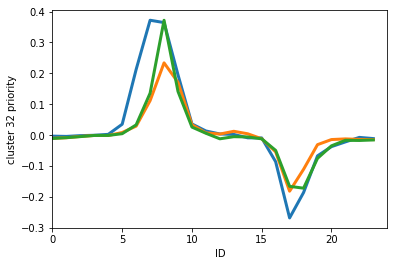

In [57]:
plt.plot(trafficPriority[27], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24) 

plt.plot(trafficPriority[0], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24)

plt.plot(trafficPriority[112], lw=3)
plt.xlabel('ID')
plt.ylabel('cluster 32 priority')
plt.xlim(0, 24) 

(0, 117)

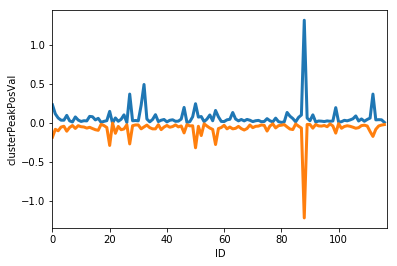

In [58]:
plt.plot(clusterPeakPosVal, lw=3)
plt.xlabel('ID')
plt.ylabel('clusterPeakPosVal')
plt.xlim(0, 117)    

plt.plot(clusterPeakNegVal, lw=3)
plt.xlabel('ID')
plt.ylabel('clusterPeakPosVal')
plt.xlim(0, 117) 

(0, 117)

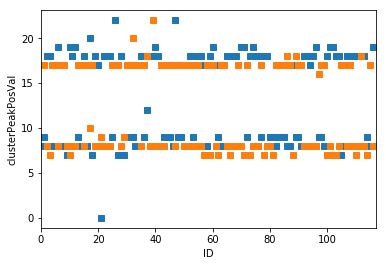

In [7]:
plt.plot(clusterPeakPosTime, 's')
plt.xlabel('ID')
plt.ylabel('clusterPeakPosVal')
plt.xlim(0, 117)   

plt.plot(clusterPeakNegTime, 's')
plt.xlabel('ID')
plt.ylabel('clusterPeakPosVal')
plt.xlim(0, 117)  

(0, 117)

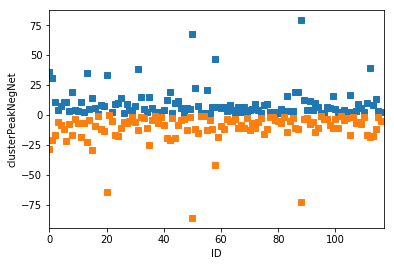

In [8]:
plt.plot(clusterPeakPosNet, 's')
plt.xlabel('ID')
plt.ylabel('clusterPeakPosNet')
plt.xlim(0, 117)   

plt.plot(clusterPeakNegNet, 's')
plt.xlabel('ID')
plt.ylabel('clusterPeakNegNet')
plt.xlim(0, 117)  

In [59]:
clusteredLocs['peakPosPriority'] = clusterPeakPosVal
clusteredLocs['peakPosTime'] = clusterPeakPosTime
clusteredLocs['peakPosNet'] = clusterPeakPosNet
clusteredLocs['peakNegPriority'] = clusterPeakNegVal
clusteredLocs['peakNegTime'] = clusterPeakNegTime
clusteredLocs['peakNegNet'] = clusterPeakNegNet

clusteredLocs['morningPriority'] = clusterMorningPriority
clusteredLocs['morningNet'] = clusterMorningNet
clusteredLocs['eveningPriority'] = clusterEveningPriority
clusteredLocs['eveningNet'] = clusterEveningNet

print(clusteredLocs)


                 name  capacity        lat       lon  peakPosPriority  \
0             Aldgate       155  51.514046 -0.074628         0.234007   
1               Angel       260  51.533240 -0.106523         0.118223   
2            Avondale       171  51.511550 -0.215143         0.065148   
3                Bank       117  51.512803 -0.091630         0.036996   
4            Bankside       210  51.506176 -0.098243         0.036648   
5            Barbican       113  51.520114 -0.095122         0.098708   
6           Battersea       389  51.471514 -0.163664         0.028301   
7       BatterseaPark       242  51.477410 -0.153850         0.014232   
8           Bayswater       246  51.514985 -0.186607         0.078507   
9           Belgravia       106  51.496673 -0.152871         0.038743   
10         Bermondsey       151  51.500848 -0.081218         0.020380   
11       BethnalGreen       357  51.527437 -0.057394         0.029963   
12          Blackwall        99  51.507199 -0.00589

In [10]:
def get_colors(ar):
    col1 = (32/255, 166/255, 255/255)
    col2 = (78/255, 85/255, 140/255)
    
    colors = []
    for i in range(len(ar)):
        lerp = i/(len(ar) - 1)
        colors += [[col1[j] * lerp + col2[j] * (1-lerp) for j in range(3)]]
    
    return colors

In [40]:
clusteredLocsSortPos = clusteredLocs.sort_values(by='peakPosPriority', ascending=False)
clusteredLocsSortNeg = clusteredLocs.sort_values(by='peakNegPriority', ascending=True)

posPeak = clusteredLocsSortPos['peakPosPriority'].iloc[20::-1]
posTime = clusteredLocsSortPos['peakPosTime'].iloc[20::-1]
posNet = clusteredLocsSortPos['peakPosNet'].iloc[20::-1]
posLocs = clusteredLocsSortPos['name'].iloc[20::-1]

negPeak = clusteredLocsSortNeg['peakNegPriority'].iloc[20::-1]
negTime = clusteredLocsSortNeg['peakNegTime'].iloc[20::-1]
negNet = clusteredLocsSortNeg['peakNegNet'].iloc[20::-1]
negLocs = clusteredLocsSortNeg['name'].iloc[20::-1]

print(clusteredLocsSortPos)
print(posPeak)
print(negPeak)


                  name  capacity        lat       lon  peakPosPriority  \
88            StJamess        60  51.507029 -0.133198         1.318868   
32          Farringdon        30  51.517776 -0.102198         0.494821   
27      DeBeauvoirTown        25  51.537278 -0.079202         0.371910   
112            WestEnd       106  51.509889 -0.133059         0.371805   
50          KingsCross       271  51.533104 -0.122257         0.248094   
0              Aldgate       155  51.514046 -0.074628         0.234007   
31              Euston       169  51.526393 -0.135866         0.229510   
46          IsleyCourt        30  51.469260 -0.141813         0.200593   
99               Tower        82  51.508933 -0.074374         0.197893   
57           MaidaVale        41  51.524460 -0.181720         0.161734   
20             Chelsea       223  51.488624 -0.167227         0.149882   
82        SloaneSquare        27  51.493130 -0.156876         0.136183   
63            Moorgate        63  51.5

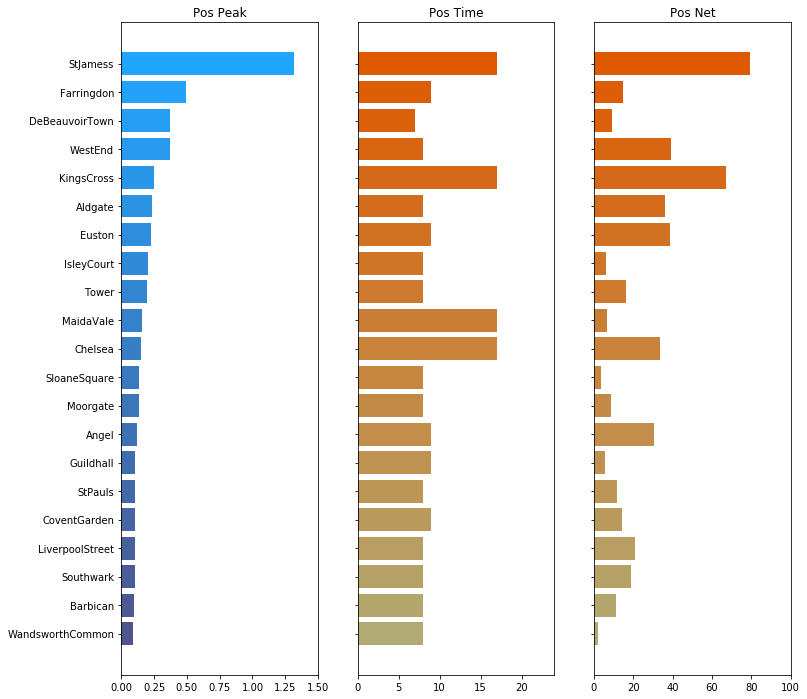

In [36]:
# Get xlocation names
fig, axes = plt.subplots(ncols=3, sharey=True)

cols = get_colors(posLocs)
axes[0].barh(posLocs, posPeak, color=cols)
axes[0].set_title('Pos Peak')
axes[0].set_xlim(0, 1.5)

inv_cols = [[1-c for c in col] for col in cols]
axes[1].barh(posLocs, posTime, color=inv_cols)
axes[1].set_title('Pos Time')
axes[1].set_xlim(0, 24)

axes[2].barh(posLocs, posNet, color=inv_cols)
axes[2].set_title('Pos Net')
axes[2].set_xlim(0, 100)

fig.set_size_inches(12, 12)
fig.savefig('posTraffic.pdf', format='pdf', bbox_inches='tight')
plt.show()

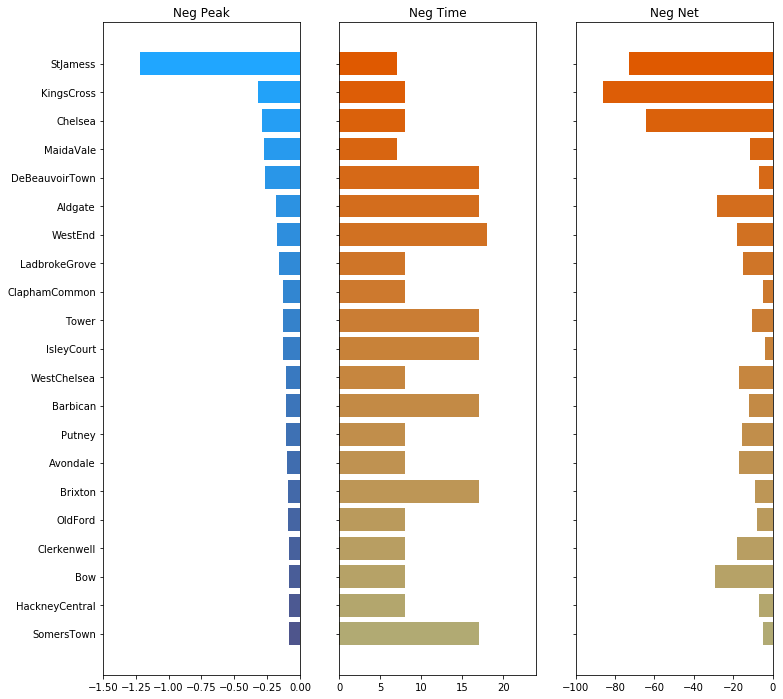

In [35]:
# Get xlocation names
fig, axes = plt.subplots(ncols=3, sharey=True)

cols = get_colors(negLocs)
axes[0].barh(negLocs, negPeak, color=cols)
axes[0].set_title('Neg Peak')
axes[0].set_xlim(-1.5,0)

inv_cols = [[1-c for c in col] for col in cols]
axes[1].barh(negLocs, negTime, color=inv_cols)
axes[1].set_title('Neg Time')
axes[1].set_xlim(0, 24)

axes[2].barh(negLocs, negNet, color=inv_cols)
axes[2].set_title('Neg Net')
axes[2].set_xlim(-100, 0)

fig.set_size_inches(12, 12)
fig.savefig('negTraffic.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [116]:
morningPriorityPos = clusteredLocs.sort_values(by='morningPriority', ascending=False)['morningPriority'].iloc[9::-1]
morningNetPos = clusteredLocs.sort_values(by='morningPriority', ascending=False)['morningNet'].iloc[9::-1]
morningLocsPos = clusteredLocs.sort_values(by='morningPriority', ascending=False)['name'].iloc[9::-1]

morningPriorityNeg = clusteredLocs.sort_values(by='morningPriority', ascending=True)['morningPriority'].iloc[9::-1]
morningNetNeg = clusteredLocs.sort_values(by='morningPriority', ascending=True)['morningNet'].iloc[9::-1]
morningLocsNeg = clusteredLocs.sort_values(by='morningPriority', ascending=True)['name'].iloc[9::-1]

eveningPriorityPos = clusteredLocs.sort_values(by='eveningPriority', ascending=False)['eveningPriority'].iloc[9::-1]
eveningNetPos = clusteredLocs.sort_values(by='eveningPriority', ascending=False)['eveningNet'].iloc[9::-1]
eveningLocsPos = clusteredLocs.sort_values(by='eveningPriority', ascending=False)['name'].iloc[9::-1]

eveningPriorityNeg = clusteredLocs.sort_values(by='eveningPriority', ascending=True)['eveningPriority'].iloc[9::-1]
eveningNetNeg = clusteredLocs.sort_values(by='eveningPriority', ascending=True)['eveningNet'].iloc[9::-1]
eveningLocsNeg = clusteredLocs.sort_values(by='eveningPriority', ascending=True)['name'].iloc[9::-1]


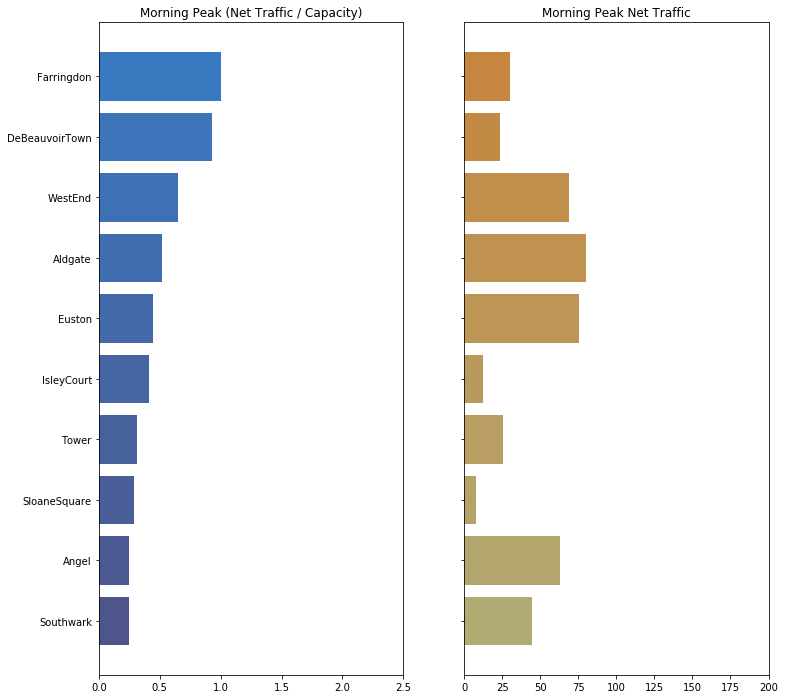

In [125]:
# Get xlocation names
fig, axes = plt.subplots(ncols=2, sharey=True)

cols = get_colors(negLocs)
axes[0].barh(morningLocsPos, morningPriorityPos, color=cols)
axes[0].set_title('Morning Peak (Net Traffic / Capacity)')
axes[0].set_xlim(0,2.5)

inv_cols = [[1-c for c in col] for col in cols]
axes[1].barh(morningLocsPos, morningNetPos, color=inv_cols)
axes[1].set_title('Morning Peak Net Traffic')
axes[1].set_xlim(0, 200)

fig.set_size_inches(12, 12)
fig.savefig('morningPriorityPos.jpeg', format='pdf', bbox_inches='tight')
plt.show()

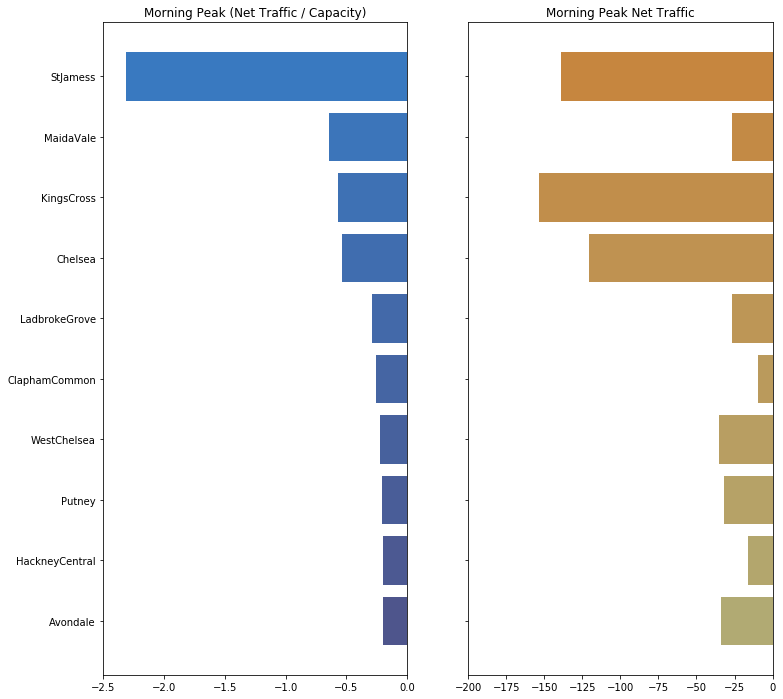

In [122]:
# Get xlocation names
fig, axes = plt.subplots(ncols=2, sharey=True)

cols = get_colors(negLocs)
axes[0].barh(morningLocsNeg, morningPriorityNeg, color=cols)
axes[0].set_title('Morning Peak (Net Traffic / Capacity)')
axes[0].set_xlim(-2.5,0)

inv_cols = [[1-c for c in col] for col in cols]
axes[1].barh(morningLocsNeg, morningNetNeg, color=inv_cols)
axes[1].set_title('Morning Peak Net Traffic')
axes[1].set_xlim(-200, 0)

fig.set_size_inches(12, 12)
fig.savefig('morningPriorityNeg.png', format='pdf', bbox_inches='tight')
plt.show()

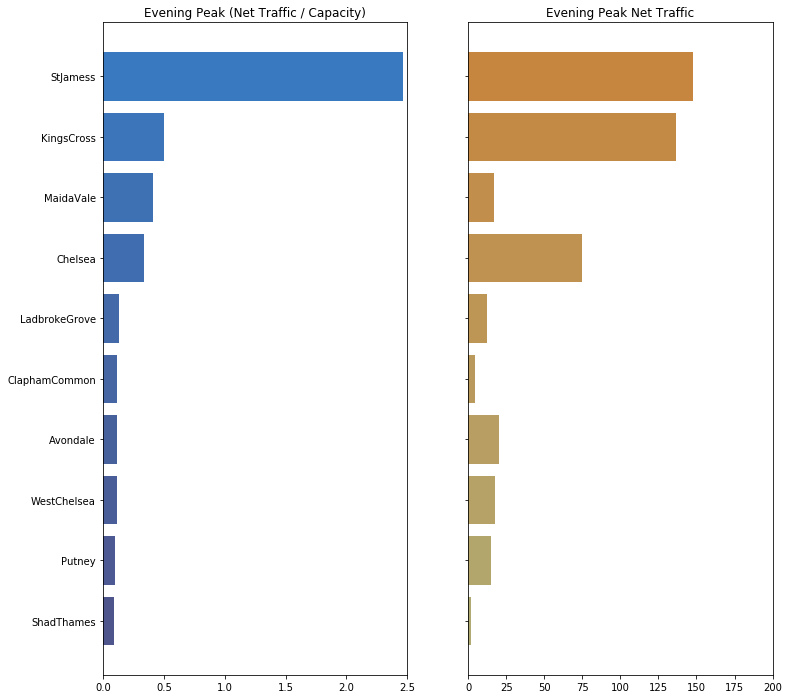

In [123]:
# Get xlocation names
fig, axes = plt.subplots(ncols=2, sharey=True)

cols = get_colors(negLocs)
axes[0].barh(eveningLocsPos, eveningPriorityPos, color=cols)
axes[0].set_title('Evening Peak (Net Traffic / Capacity)')
axes[0].set_xlim(0,2.5)

inv_cols = [[1-c for c in col] for col in cols]
axes[1].barh(eveningLocsPos, eveningNetPos, color=inv_cols)
axes[1].set_title('Evening Peak Net Traffic')
axes[1].set_xlim(0, 200)

fig.set_size_inches(12, 12)
fig.savefig('eveningPriorityPos.png', format='pdf', bbox_inches='tight')
plt.show()

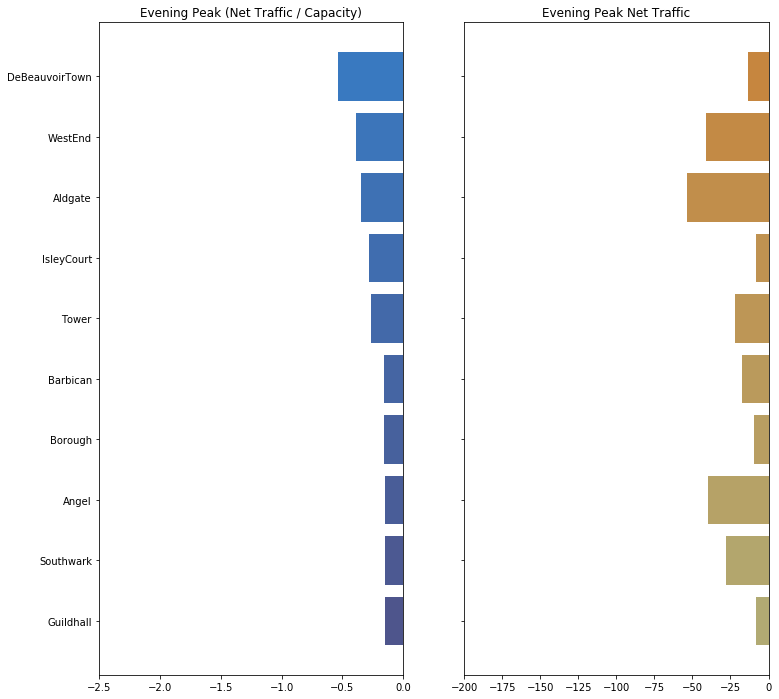

In [124]:
# Get xlocation names
fig, axes = plt.subplots(ncols=2, sharey=True)

cols = get_colors(negLocs)
axes[0].barh(eveningLocsNeg, eveningPriorityNeg, color=cols)
axes[0].set_title('Evening Peak (Net Traffic / Capacity)')
axes[0].set_xlim(-2.5,0)

inv_cols = [[1-c for c in col] for col in cols]
axes[1].barh(eveningLocsNeg, eveningNetNeg, color=inv_cols)
axes[1].set_title('Evening Peak Net Traffic')
axes[1].set_xlim(-200,0)

fig.set_size_inches(12, 12)
fig.savefig('eveningPriorityNeg.png', format='pdf', bbox_inches='tight')
plt.show()